# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [37]:
pip install citipy


[notice] A new release of pip available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | alaghsas
Processing Record 4 of Set 1 | rongelap
Processing Record 5 of Set 1 | tazacorte
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | arteche
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | nova sintra
Processing Record 10 of Set 1 | kiunga
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | vilyuchinsk
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | huancavelica
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | villa ojo de agua
Processing Record 20 of Set 1 | kingisepp
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | howrah
Proce

In [11]:
city_url

'http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5352eb7897ad7bdb3203fe3e9d2d3079&q=mandera'

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [13]:
city_data

[{'City': 'bethel',
  'Lat': 41.3712,
  'Lng': -73.414,
  'Max Temp': 22.09,
  'Humidity': 53,
  'Cloudiness': 100,
  'Wind Speed': 2.57,
  'Country': 'US',
  'Date': 1686007102},
 {'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 3,
  'Humidity': 63,
  'Cloudiness': 52,
  'Wind Speed': 16.84,
  'Country': 'TF',
  'Date': 1686007102},
 {'City': 'alaghsas',
  'Lat': 17.0187,
  'Lng': 8.0168,
  'Max Temp': 33.67,
  'Humidity': 13,
  'Cloudiness': 27,
  'Wind Speed': 4.46,
  'Country': 'NE',
  'Date': 1686007103},
 {'City': 'rongelap',
  'Lat': 11.1635,
  'Lng': 166.8941,
  'Max Temp': 27.85,
  'Humidity': 78,
  'Cloudiness': 72,
  'Wind Speed': 7.37,
  'Country': 'MH',
  'Date': 1686007103},
 {'City': 'tazacorte',
  'Lat': 28.629,
  'Lng': -17.9293,
  'Max Temp': 22.54,
  'Humidity': 91,
  'Cloudiness': 0,
  'Wind Speed': 6.17,
  'Country': 'ES',
  'Date': 1686007103},
 {'City': 'port elizabeth',
  'Lat': -33.918,
  'Lng': 25.5701,
  'Max Temp': 9.16,
  'Humi

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,22.09,53,100,2.57,US,1686007102
1,port-aux-francais,-49.3500,70.2167,3.00,63,52,16.84,TF,1686007102
2,alaghsas,17.0187,8.0168,33.67,13,27,4.46,NE,1686007103
3,rongelap,11.1635,166.8941,27.85,78,72,7.37,MH,1686007103
4,tazacorte,28.6290,-17.9293,22.54,91,0,6.17,ES,1686007103


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,22.09,53,100,2.57,US,1686007102
1,port-aux-francais,-49.3500,70.2167,3.00,63,52,16.84,TF,1686007102
2,alaghsas,17.0187,8.0168,33.67,13,27,4.46,NE,1686007103
3,rongelap,11.1635,166.8941,27.85,78,72,7.37,MH,1686007103
4,tazacorte,28.6290,-17.9293,22.54,91,0,6.17,ES,1686007103


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

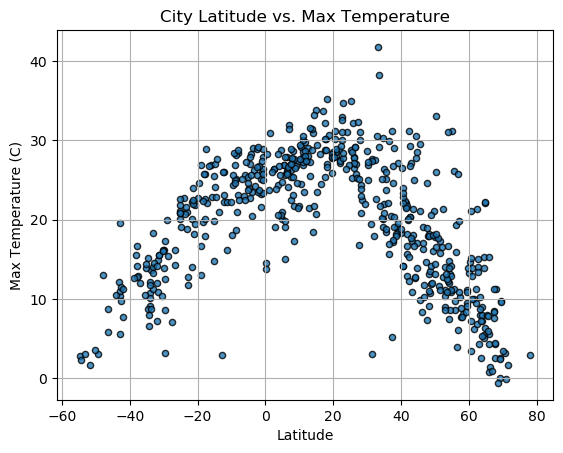

In [21]:
# Build scatter plot for latitude vs. temperature
# Build scatter plot for latitude vs. temperature
ax1 = city_data_df.plot.scatter(x='Lat', y='Max Temp',edgecolor='black',alpha=0.8, marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

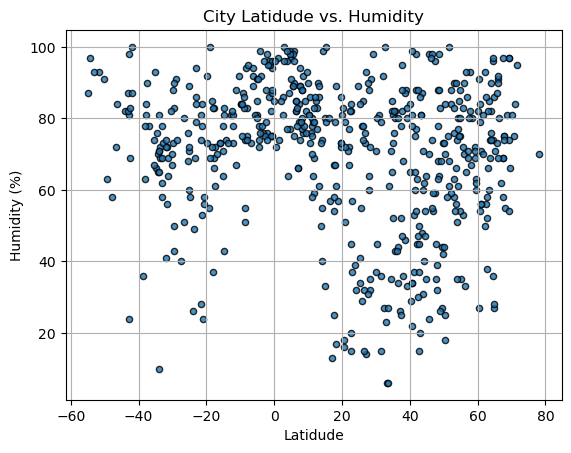

In [22]:
# Build the scatter plots for latitude vs. humidity
ax1 = city_data_df.plot.scatter(
    x='Lat', y='Humidity', edgecolor='black', alpha=0.8, marker='o')

# Incorporate the other graph properties
plt.title("City Latidude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latidude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

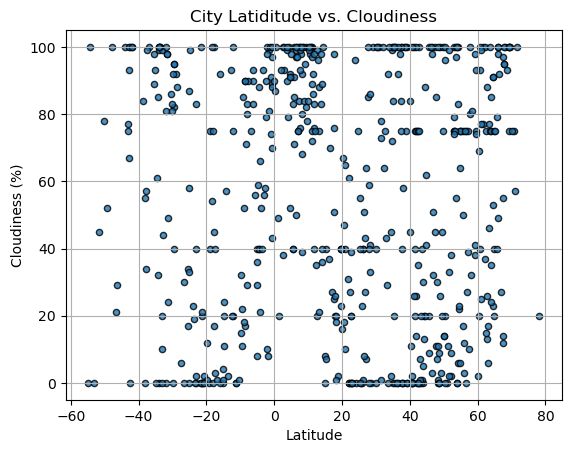

In [23]:
# Build the scatter plots for latitude vs. cloudiness
ax1 = city_data_df.plot.scatter(
    x='Lat', y='Cloudiness', edgecolor='black', alpha=0.8, marker='o')

# Incorporate the other graph properties
plt.title("City Latiditude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

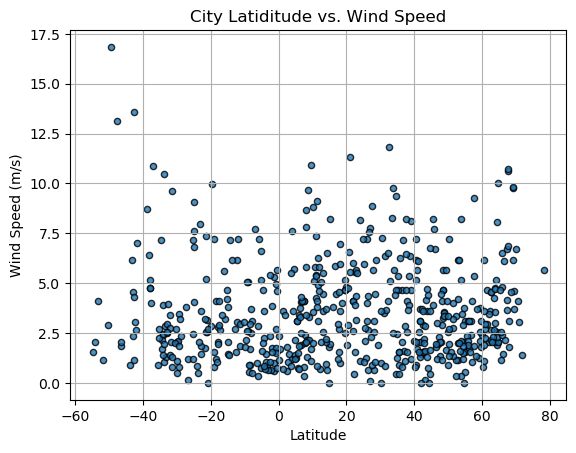

In [24]:
# Build the scatter plots for latitude vs. wind speed
ax1 = city_data_df.plot.scatter(
    x='Lat', y='Wind Speed', edgecolor='black', alpha=0.8, marker='o')

# Incorporate the other graph properties
plt.title("City Latiditude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,22.09,53,100,2.57,US,1686007102
2,alaghsas,17.0187,8.0168,33.67,13,27,4.46,NE,1686007103
3,rongelap,11.1635,166.8941,27.85,78,72,7.37,MH,1686007103
4,tazacorte,28.6290,-17.9293,22.54,91,0,6.17,ES,1686007103
6,arteche,12.2645,125.4048,27.35,85,35,0.68,PH,1686007103


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,3.00,63,52,16.84,TF,1686007102
5,port elizabeth,-33.9180,25.5701,9.16,81,0,1.03,ZA,1686007103
9,kiunga,-6.1219,141.2906,25.67,92,90,0.33,PG,1686007104
11,blackmans bay,-43.0167,147.3167,10.41,87,77,4.57,AU,1686007104
12,adamstown,-25.0660,-130.1015,20.81,60,58,9.09,PN,1686007104


###  Temperature vs. Latitude Linear Regression Plot

-0.747852559905271


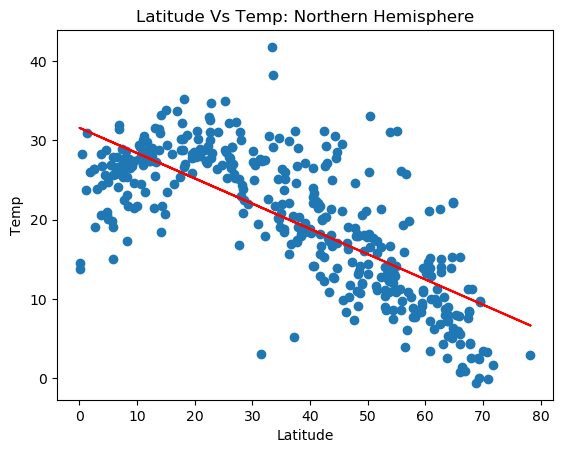

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.title("Latitude Vs Temp: Northern Hemisphere")
print(r_value)

0.8429318116627179


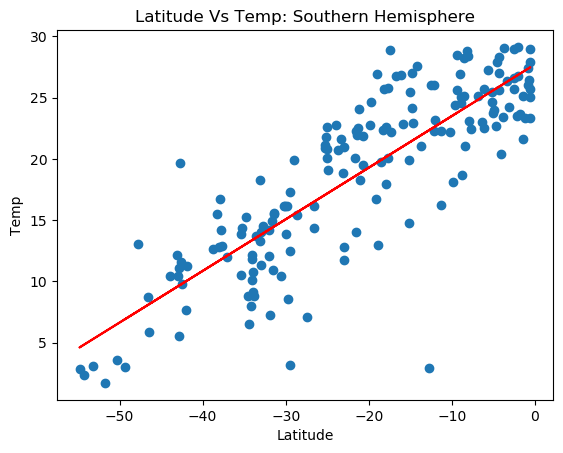

In [40]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.title("Latitude Vs Temp: Southern Hemisphere")
print(r_value)

**Discussion about the linear relationship:** The Latitude vs Temperature in the Northern Hemisphere has a r-value of -0.74 and the Latitude vs Temperature in the Southern Hemiphere has a r-value
of 0.84, indicating that the former has a strong negative correlation and the latter has a strong postive correlation. 

### Humidity vs. Latitude Linear Regression Plot

-0.11828608016819622


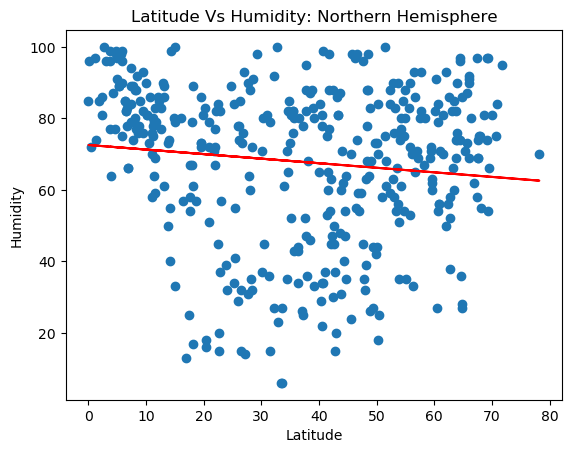

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude Vs Humidity: Northern Hemisphere")
print(r_value)

0.195569249941226


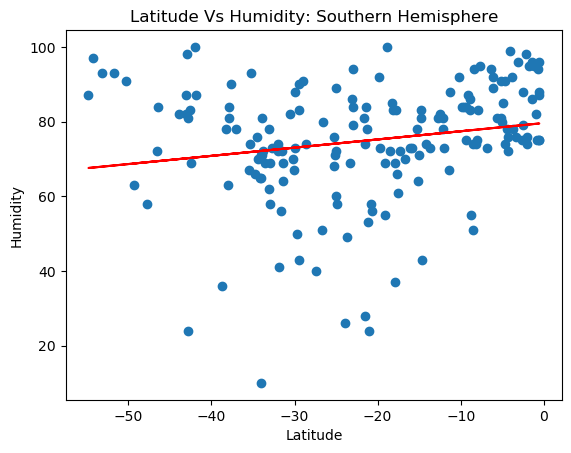

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude Vs Humidity: Southern Hemisphere")
print(r_value)

**Discussion about the linear relationship:** The Latitude vs Humidity in the Northern Hemisphere has a r-value of -0.11 and the Latitude vs Humidity in the Southern Hemiphere has a r-value
of 0.19, indicating that the former has a weak negative correlation and the latter has a weak postive correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

-0.1233529982336128


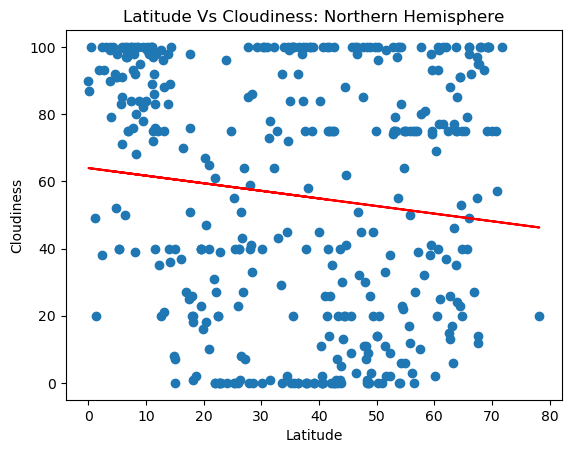

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude Vs Cloudiness: Northern Hemisphere")
print(r_value)

-0.050570453889112785


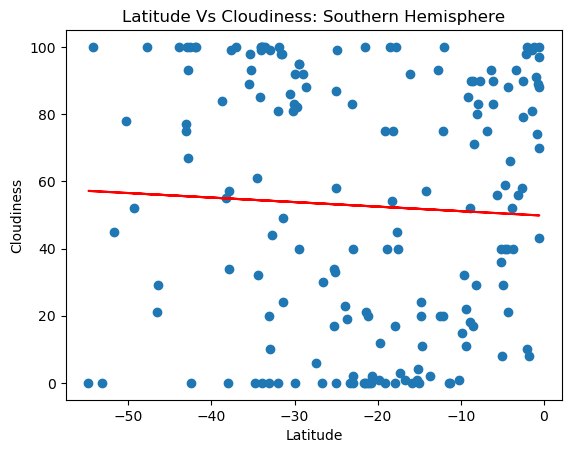

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude Vs Cloudiness: Southern Hemisphere")
print(r_value)

**Discussion about the linear relationship:** The Latitude vs Cloudiness in the Northern Hemisphere has a r-value of -0.12 and the Latitude vs Cloudiness in the Southern Hemiphere has a r-value
of -0.05, indicating that the former has a weak negative correlation and the latter has a very weak negative correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

0.0019841243902726383


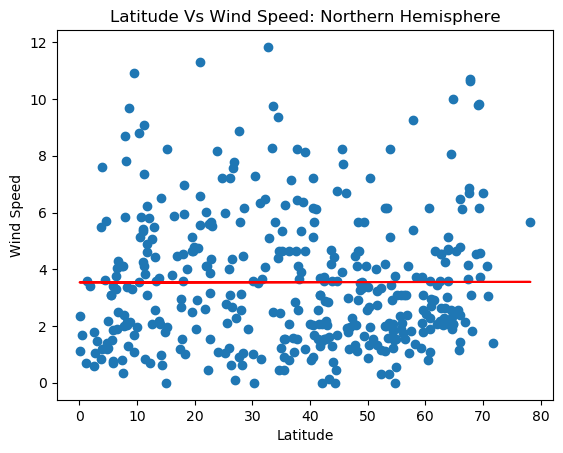

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude Vs Wind Speed: Northern Hemisphere")
print(r_value)

-0.2135449293355214


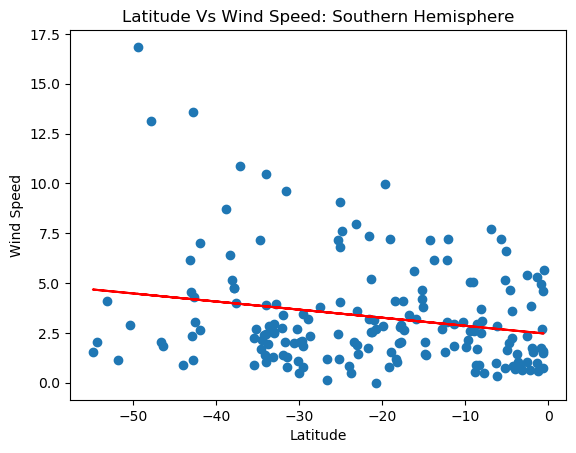

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude Vs Wind Speed: Southern Hemisphere")
print(r_value)

**Discussion about the linear relationship:** The Latitude vs Wind Speed in the Northern Hemisphere has a r-value of 0.001 and the Latitude vs Wind Speed in the Southern Hemiphere has a r-value
of -0.21, indicating that the former has no correlation and the latter has a negative correlation. 